# Home Assignment No. 1: Part 1 (Practice)
To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of our yown code. There exists a class/method for almost everything you can imagine (related to this homework).

* To do this part of homework, you have to write **CODE** directly inside specified places incide notebook **CELLS**.

* In some problems you are asked to provide short discussion of the results. In this cases you have to create **MARKDOWN** cell with your comments right after the your code cell.

* For every separate problem you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e. if the reviewer decides to execute `Kernel` -> `Restart Kernel and Run All Cells`, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest to fix random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include neccessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

Before the start, read several additional recommendations.
* Probably you lauch `jupyter notebook` or `ipython notebook` from linux console. Try `jupyter lab` instead - it is a more convenient environment to work with notebooks.
* Probably the PC on which you are going to evaluate models has limited CPU/RAM Memory. In this case, we recommend to monitor the CPU and Memory Usage. To do this, you can execute `htop` (for CPU/RAM) or `free -s 0.2` (for RAM) in terminal.
* Probably tou have multiple Cores (CPU) on your PC. Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.

To begin with, lets import the essential (for this assignment) libraries.

In [1]:
import numpy as np

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import pandas as pd

from sklearn.datasets import make_moons, make_circles

from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### BEGIN Your imports
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
import timeit
### END Your imports

## Task 1. Numpy Problem 1 (1 point)

Write a function, which takes a matrix `arr` and centers each of its rows
by the mean within that row. Check [this](https://docs.scipy.org/doc/numpy/reference/routines.statistics.html)
out for documentation.

In [2]:
def center(arr):
    """Center each row of a matrix by the mean value in that row.

    Parameters
    ----------
    arr : array, shape = (n_rows, n_cols)
        The matrix, the rows of which to center.

    Returns
    ----------
    out : array, shape = (n_rows, n_cols)
        The final row-centered matrix.
    """
    assert arr.ndim == 2
    # n_rows, n_cols = arr.shape I don't need it

    ### BEGIN Solution
    out = np.apply_along_axis(lambda x: x - np.mean(x), 1, arr)
    ### END Solution

    return out

<br/>

## Task 2. Numpy Problem 2 (1 point)

Implement the following fancy function:
\begin{equation}
    f(x) = \sigma\bigl(
                \max\{x + 5, 0\} + \max\{5 - x, 0\}
                + \max\{\min\{\cos(2 x \pi), \tfrac12\}, -\tfrac14\}
            \bigr)
         \,,
\end{equation}
where $\sigma(x) = (1+e^{-x})^{-1}$ is the sigmoid function.

In [3]:
def fancy_function(x):
    """Compute some fancy function.
    
    Parameters
    ----------
    x : array, 1 dimendional, shape=(n_samples,)
        The array argument values.

    Returns
    -------
    y : array, 1 dimendional, shape=(n_samples,)
        The values of the fancy function.
    """
    ### BEGIN Solution
    sigma = lambda y: 1 / (1 + np.exp(- y))
    out = sigma(np.maximum(x + 5, 0) + np.maximum(5 - x, 0) + 
                np.maximum(np.minimum(np.cos(2 * x * np.pi), .5), - .25))
    ### END Solution
    
    return out

Plot the function

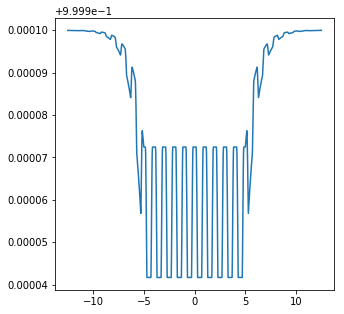

In [4]:
x = np.linspace(-12.5, 12.5, num=1001)
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x, fancy_function(x))
plt.show()

## Task 3. Matplotlib (2 points)

Plot the level sets of the $l^p$ norm
\begin{equation}
    \|z\|_p = \biggl(\sum_i \lvert x_i\rvert^p\biggr)^\tfrac1{p}
        \,.
\end{equation}
and make the contour of the unit ball in $l^p$ norm stand out. Draw plots
for $p \in \{0, \tfrac1{25}, \tfrac12, 1, 1.5, 2, 7, \infty\}$.

Study plotting examples on [this](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.contourf.html#matplotlib.pyplot.contourf) and [this](http://scikit-learn.org/stable/auto_examples/svm/plot_oneclass.html) pages (**especially the last one**) and have a look at these functions: *np.meshgrid*, *np.linspace* in numpy's documentation. We suggest to use `np.linalg.norm`.

Try to produce a plot that **looks like the one below**:

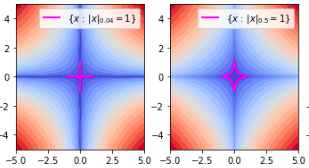

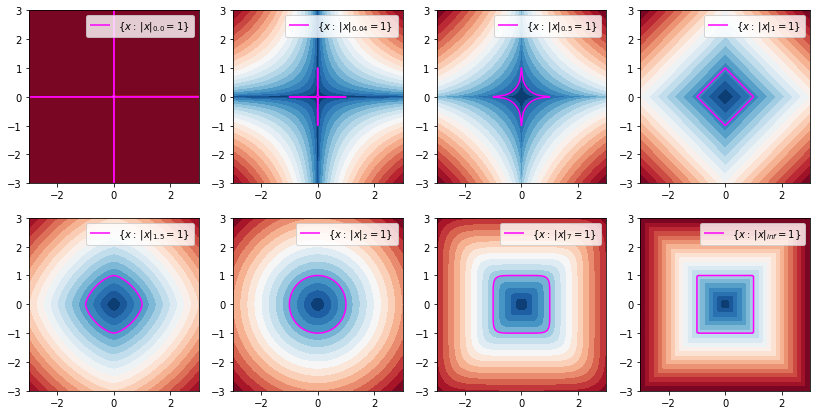

In [5]:
p_values = [0., 0.04, 0.5, 1, 1.5, 2, 7, np.inf]
xx, yy = np.meshgrid(np.linspace(-3, 3, num=101),
                     np.linspace(-3, 3, num=101))

fig, axes = plt.subplots(ncols=(len(p_values) + 1)// 2,
                         nrows=2, figsize=(14, 7))

for p, ax in zip(p_values, axes.flat):
    ### BEGIN Solution
    res = np.linalg.norm([xx, yy], ord=p, axis=0)
    heatmap = ax.contourf(xx, yy, res, cmap=plt.cm.RdBu_r, levels=20)
    line = ax.contour(xx, yy, res, cmap=plt.cm.spring, levels=[1])
    ax.legend([line.collections[0]], ['{{$x: \: |x|_{} = 1$}}'.format({p})])
    ### END Solution

plt.show()

## Task 4. Decision Rules and Feature Engeneering (1+1=2 points)

In this task your goal is to visualize the decision rules of several classifiers applied to artificial $2$-dimensional dataset generated by builtin `sklearn.datasets` method called `make_moons`. In the cell below we generate the dataset.

In [6]:
X, y = make_moons(n_samples=500, noise=0.2, random_state=404)

### Subproblem 4.1. Decision Rule Plotting (1 of 2 points)

The goal of the subproblem is to fit the following classifiers on features `X` to target `y`:
* Decision Tree (single!) with small depth (e.g. $4$);
* Random Forest with small number of trees (e.g. $25$) of low depth;
* Logistic Regreesion;
* Support Vector Machine with RBF kernel;
* Gaussian Naive Bayes;
* k-Nearest Neighbor Classifier with small number of neighbors (e.g. $3$);

For all the fitted classifiers you have to plot the decision regions (the example is shown below the cell). Each plot must have **Title** which contains name of the classifier and its accuracy on the data.

You can write the plotting code on your own, but we highly recommend just to use `mlxtend` library (`pip install mlxtend` in linux terminal), which has awesome one-line decision rule plotting function (you are to [google](http://google.com) it).

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

from mlxtend.plotting import plot_decision_regions

/home/hegnatin/projects/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hegnatin/projects/.venv/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


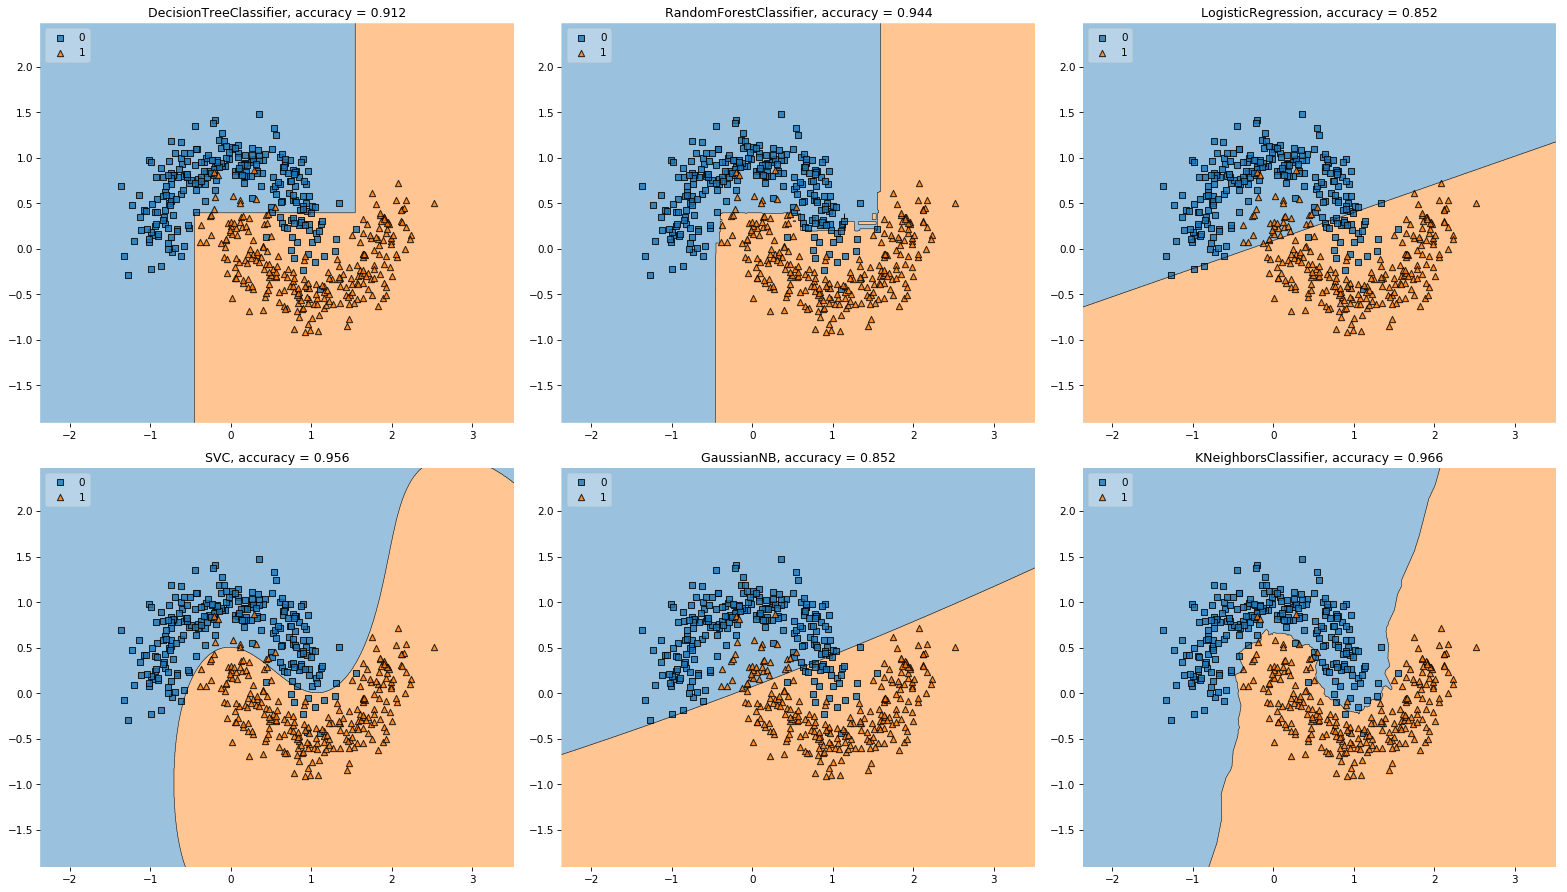

In [11]:
clfs = [
    # List classifiers
    DecisionTreeClassifier(max_depth=4),
    RandomForestClassifier(n_estimators=25, max_depth=4),
    LogisticRegression(),
    SVC(kernel='rbf'),
    GaussianNB(),
    KNeighborsClassifier()
]

fig, axes = plt.subplots(
    ncols=(len(clfs) + 1)// 2,
    nrows=2, figsize=(6 * ((len(clfs) + 1)) // 2, 12),
    dpi=75
)

for clf, ax in zip(clfs, axes.flat):
    clf.fit(X, y)
    # Plot decision regions
    plot_decision_regions(X=X, y=y, clf=clf, legend=2, ax=ax)
    name = clf.__class__.__name__
    acc = accuracy_score(y_true=y, y_pred=clf.predict(X))
    ax.set_title('{}, accuracy = {}'.format(name, acc))
fig.tight_layout()

### Subproblem 4.2. Pipeline: Fitting to Data by Feature Engeneering (1 of 2 points)
In previous task 1.1 several classifiers obviously failed fitting to data. This happend because the decision rule of the classifier has a restricted form (e.g. linear for linear models), while the data is more complicated.

One may try to change the parameters of the classifier (e.g. increase the number of trees in Forest) in order to improve accuracy, but some models (especially linear) do not have parameters that can change the form of the decision rule.

In this case, the **feature engeneering** helps: one may try to compute new (e.g. non-linear) features based on the existing pool and fit the classifier in the new features. This may help low-complex claffifiers to fit to hard data dependencies.

Your task it to
* Choose **two classifiers** from the following: Decision Tree, Random Forest, Naive Bayes, Logistic Regression;
* By generating of additional features (e.g. polynomial) make them achieve accuracy $>0.95$.
* For each classifier, write 2-3 sentences why did you decide to choose these features.
* Plot their decision rules in the original feature space.

It is your choice how to generate features. You may create hand-crafted featues and add them manualy. Nevertheless, we **highly suggest** to get used to and apply the following builtin `sklearn` methods:
* `PolynomialFeatures`, `GaussianRandomProjection` among others - for feature generation
* `StandartScaler`, `MinMaxScaler` among others - for feature scaling
* `Pipeline` - for combining several operations in a row (e.g. feature creation & prediction)

/home/hegnatin/projects/.venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/hegnatin/projects/.venv/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


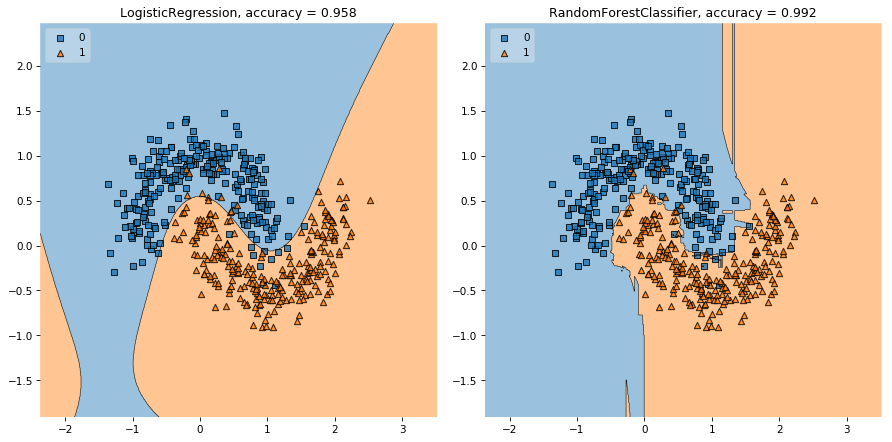

In [12]:
pipes = [make_pipeline(PolynomialFeatures(4), LogisticRegression(random_state=420)), 
         make_pipeline(PolynomialFeatures(4), RandomForestClassifier(random_state=420))]

fig, axes = plt.subplots(
    ncols=2, figsize=(12, 6),
    dpi=75
)

for pipe, ax in zip(pipes, axes.flat):
    name = pipe.steps[1][1].__class__.__name__
    pipe.fit(X, y)
    # Plot decision regions
    plot_decision_regions(X=X, y=y, clf=pipe, legend=2, ax=ax)
    y_pred = pipe.predict(X)
    acc = accuracy_score(y_true=y, y_pred=y_pred)
    ax.set_title('{}, accuracy = {}'.format(name, acc))
fig.tight_layout()

## Task 5. Model Selection (1+1 points)

You are to test Random Forests and Support Vector Machines on a trivial [Tic Tac Toe Endgame Dataset](https://datahub.io/machine-learning/tic-tac-toe-endgame). Let's load it.

In [13]:
data = pd.read_csv('data/tic-tac-toe.csv')
X, y = data.drop('class', axis=1), data['class'].astype(int)
data.sample(3)

,TL,TM,TR,ML,MM,MR,BL,BM,BR,class
599,b,b,x,o,o,x,b,b,x,True
415,o,o,b,x,o,b,x,x,x,True
147,x,o,o,x,x,x,o,b,b,True


The dataset consists of several possible endgame positions of the Tic-Tac-Toe game. The target variable is the victory of `x` player over `o` player (victory or defeat/draw). Since the features are categorical, we simply transform them to real-valued $-1$ for `o`, $1$ for `x` and $0$ for emply cell `b`.

In [14]:
X = X.applymap(lambda v: 1 if v == 'x' else -1 if v == 'o' else 0)
X.sample(4).sort_index()

,TL,TM,TR,ML,MM,MR,BL,BM,BR
275,1,0,0,1,1,-1,1,-1,-1
501,0,1,-1,-1,1,1,-1,1,0
671,1,1,0,0,0,1,-1,-1,-1
905,0,1,-1,0,-1,1,-1,0,1


We are going to test how machine learning algorithms can classify the final game positions into the ones when `x` player won and all others. Everybody knows that for this problem there is a simple decision rule: `x` wins if there are three `x`'s in a row/column/diagonal. But can our cool machine learning tools catch this trivial dependence? In this problem the class balance is around $2:1$ so we still use accuracy metric.

Intuitively, this rule is logical, i.e. one may expect decision-tree-based algorithm to be the most appropriate for this case. But is that true? In the code below we compare huge Random forest with simple Logistic Regression and SVM with default parameters.

In [15]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10)
svm = SVC(gamma='auto')
lr = LogisticRegression(solver='lbfgs')
clfs = (rf, svm, lr)

for clf in clfs:
    score = cross_val_score(clf, X, y, cv=5).mean()
    name = clf.__class__.__name__
    print(f'{name} scored {round(score, 3)}')

RandomForestClassifier scored 0.891
SVC scored 0.941
LogisticRegression scored 0.983


We **counterintuitively** see that RandomForest is outperformed by SVM. Moreover, the simplest Logistic regression significantly outperforms everything. Let's improve Random Forest and SVM in order to be able to compete with Logistic model.

### Subproblem 5.1. Model selection for SVM (1 of 2 points)
Perform **Grid Search** for optimal hyperparameter for SVM model in order to achieve 5-fold validation score on the data not lower than $0.98$. You can code the Grid Search Manually, but we highly encourage yo use builtin `GridSearchCV` method.

In [16]:
### BEGIN Solution
svc_feats = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['auto', 'scale'],
    'C': [1., .8, .5, .3, .1]
}
GS = GridSearchCV(estimator=SVC(), param_grid=svc_feats, cv=5, iid=False)
GS.fit(X, y)
cross_val_score(GS.best_estimator_, X, y, cv=5).mean()
### END Solution

0.9905759162303666

### Subproblem 5.2. Feature engeneering for Random Forest  (1 of 2 points)
Perform **feature engeneering** for Random Forest in order to achieve 5-fold validation score not lower than $0.94$. Write 2-3 sentences to explicitly explain your motivation for provided feature choice.

In [17]:
rf = RandomForestClassifier(n_estimators=400, max_depth=10, random_state=404)

### BEGIN Solution
# Нормально описать примерно следующее:
# I want to calculate sum of the values on the
# possible winning directions because the main
# win condition is string with 3 same symbols

#Getting winning combinations from columns,
#represating them as the field = matrix 3x3
win_combinations = []
field = np.array(X.columns.tolist()).reshape((3,3))
for j in [1, -1]:
    i = int((j + 1) / 2) # just required indexing, do not mind
    np.apply_along_axis(func1d=lambda x: win_combinations.append(x), axis=i, arr=field)
    win_combinations.append(field[:,::j].diagonal())

for combination in win_combinations:
    X[str(combination)] = X[combination].sum(axis=1)
### END Solution

score = cross_val_score(rf, X, y, cv=5).mean()
name = rf.__class__.__name__
print(f'{name} scored {round(score, 3)} for extra features')

RandomForestClassifier scored 0.947 for extra features


## Task 6. Bagging Ensembles of Regressors (2 points)
In this problem you are to deal with [Concrete Compressive Strength Dataset](https://www.kaggle.com/elikplim/concrete-compressive-strength-data-set). You goal will be to determine the optimal parameters for two Bagging-Based Forest Ensemble **Regressors** and compare the forests. Lets load the data and split it into test and train parts.

In [18]:
data = pd.read_csv('data/concrete.csv').astype(float)
X = data.drop('concrete_compressive_strength', axis=1)
y = data.concrete_compressive_strength

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

data.sample(3).sort_index()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
10,198.6,132.4,0.0,192.0,0.0,978.4,825.5,90.0,38.07
128,401.8,94.7,0.0,147.4,11.4,946.8,852.1,28.0,68.50
471,446.0,24.0,79.0,162.0,11.6,967.0,712.0,28.0,57.03


Please note that both in Task 4 and Task 5 the whole data was the Train Data. In Task 4 the output score (accuracy) was the **train** score (i.e. the score on the train data of the model fitted on the same data). In task 5 the output score was the **validation score**, i.e. the result of validating the model on the train data.

In this problem, we do a step further and split the whole data into train part (on which we train & validate) and test part (where we compute the final **test** score on the validated model).

In this problem you are to consider the `RandomForestRegressor` and `ExtraTreesRegressor` models for the prediction of concrete compressive strength under **squared loss function** (mean squared error). Recall that Random Forest was discussed in the lectures. [Extremely Randomized Forest](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.65.7485&rep=rep1&type=pdf) is an other bootstraped forest with simple tree building algorithm. Basically, each split of each tree node is chosen at random both w.r.t. feature and threshold (while in random forest the split minimizes impurity).

You have to do the following steps and answer the following questions:
* For both Forests perform the Grid Search (on the train data) over most important algorithm's parameters (what are they?) to determine the optimal hyperparameters.
* For the optimal parameters output the train, validation score and the score for predicting for the test data.
* Compare the obtained scores. Explain, why the scores differ a lot for train and validation/test.
* Which of the algorithms perform better on the training set? Explain why!

In [1026]:
### BEGIN Solution
models = [RandomForestRegressor(), ExtraTreesRegressor()]
models_names = list(map(lambda x: x.__class__.__name__, models))
trees_feats = {
    'max_depth': [10, 100, 300, None],
    'n_estimators': [10, 100, 300]
}
train_err = []
valid_err = []
test_err = []

for model in models:
    GS = GridSearchCV(estimator=model, param_grid=trees_feats, cv=5, iid=False)
    GS.fit(X_train, y_train)
    
    y_pred_train = GS.predict(X_train)
    train_err.append(mean_squared_error(y_train, y_pred_train))
    
    y_pred_test = GS.predict(X_test)
    test_err.append(mean_squared_error(y_test, y_pred_test))
    
    valid_err.append(-cross_val_score(GS.best_estimator_,
                                      X, y, cv=5).mean()) # ПОСТАВИТЬ МSE МЕТРИКУ____############ TASK MARKER ############ TASK MARKER ############ TASK MARKER
    
output = pd.DataFrame(index=models_names)
output['Train'] = train_err
output['Valid'] = valid_err
output['Test'] = test_err
output.index.rename('Ensemble Classifier', inplace=True)
print(output)
### END Solution

                          Train       Valid       Test
Ensemble Classifier                                   
RandomForestRegressor  4.367767  124.865874  24.962239
ExtraTreesRegressor    1.319621   94.746813  22.373339


## Task 7. Multi-Label Classification Strategies (2 points)
In this task you deal with multiclass classification problem for [Glass Classification Data](https://www.kaggle.com/uciml/glass). Lets load the dataset.

In [1027]:
data = pd.read_csv('data/glass.csv')
X, y = data.drop('Type', axis=1), data.Type
data.sample(3)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
162,1.52211,14.19,3.78,0.91,71.36,0.23,9.14,0.0,0.37,3
144,1.51660,12.99,3.18,1.23,72.97,0.58,8.81,0.0,0.24,2
49,1.51898,13.58,3.35,1.23,72.08,0.59,8.91,0.0,0.00,1


The features of each glass oject correspond to the fraction of the particular chemical element in the object. The target variable corresponds to the type of glass (6 classes).

In this problem you have to empirically compare the time complexity and performance of several multiclass labeling strategies for different algorithms. You must consider the following algorithms:
* Single Decision Tree (depth 7)
* Medium Random Forest (100 trees of depth 3)
* KNearestNeighbors (5 neighbors)
* Logistic Regression

Note that all these algorithms by default support **multiclass labeling**. Nevertheless, we want you to compare this approach with **OneVSRest** and **OneVSOne** approaches applied to this algorithms. More precisely, for every pair (algorithm, approach) you are to perform 5-fold cross validation on the data and output the validation score and the computation time in the **table** form. Please note that you also have to choose the metric to optimize during CV (e.g. accuracy, balanced accuracy) on your own. 

After that, you are to answer the following questions:
* Which metric did you choose to optimize during cross validation and why? Explain
* For which algorithms the usage of OneVSRest/OneVSOne approach provides significantly better performance without significant increase in computation time?

In [1130]:
### BEGIN Solution
#__INIT__
models = [
    DecisionTreeClassifier(max_depth=7),
    RandomForestClassifier(n_estimators=100, max_depth=3),
    KNeighborsClassifier(n_neighbors=5),
    LogisticRegression(solver='liblinear', multi_class='auto')
]

res = []
tables_names = ['Training Duration (CV=5)', 'Cross Validation Scores']
for i in range(2):
    res.append(pd.DataFrame(index=['Multiclass', 'OneVsRest', 'OneVsOne'],
                        columns=['DecisionTreeClassifier', 'RandomForestClassifier',
                                 'KNeighborsClassifier', 'LogisticRegression']))
    res[i].name = tables_names[i]
    
#__BODY__
def time_cv(model):
    global X,y
    #Time
    start = timeit.default_timer()
    model.fit(X, y)
    stop = timeit.default_timer()
    time = stop - start
    
    #CV
    cv = cross_val_score(model, X, y, cv=5).mean() # УСТАНОВИТЬ МЕТРИКУ И ОБЪЯСНИТЬ ############ TASK MARKER ############ TASK MARKER ############ TASK MARKER
    return time, cv

for j, model in enumerate(models):
    for i, estimator in enumerate([model, OneVsRestClassifier(model), OneVsOneClassifier(model)]):
        res[0].iloc[i, j], res[1].iloc[i, j] = time_cv(model)

for table in res[::-1]:
    print(table.name)
    display(table)
### END Solution

Cross Validation Scores


,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.612865,0.599213,0.610139,0.579985
OneVsRest,0.598071,0.595611,0.610139,0.579985
OneVsOne,0.588626,0.58988,0.610139,0.579985


Training Duration (CV=5)


,DecisionTreeClassifier,RandomForestClassifier,KNeighborsClassifier,LogisticRegression
Multiclass,0.00171461,0.0648681,0.00105401,0.00273405
OneVsRest,0.00127393,0.0585061,0.000746845,0.00250075
OneVsOne,0.00164097,0.0591059,0.000604548,0.00245356
